# WPO 3
[Oefening 2](#oef2)

[Oefening 3](#oef3)

[Oefening 4](#oef4)
***

In [1]:
import numpy as np # numerical calculations in python
from scipy.optimize import fmin, fsolve
from scipy.misc import derivative
import matplotlib.pyplot as plt # package for plotting
from matplotlib import rc
rc('text', usetex=True)

# allow to show plots inline
%matplotlib inline 

<a id="oef2"></a> 
## Oefening 2:
Beschouw een experimentele opstelling waarbij je de zwaartekrachtversnelling meet aan de hand van een balletje dat losgelaten wordt door een elektromagneet. Je meet de tijd t die het balletje nodig heeft om een afstand $d = \frac{1}{2}gt^2$ te overbruggen. Je bekomt volgende resultaten, met een onzekerheid van 0.01 s.

| tijd (s) | 0.16 | 0.40 | 0.58 | 0.72 |0.97 |
|---|---|---|---|---|---|
| afstand (m) | 0.20 | 1.00 | 2.00 | 3.00 |5.00 |

Schat de zwaartekrachtversnelling met onzekerheid, m.b.v. de kleinste kwadraten methode, waarbij je veronderstelt dat
<ol>
  <li>de tijden zijn zoals hierboven.</li>
  <li>het magneetveld een onbekende maar vaste tijd nodig heeft om tot nul te zakken en het balletje los te laten.</li>
</ol>

#### Deel 1: de tijden zijn zoals hierboven


In [35]:
tijd = np.asarray([0.16, 0.40, 0.58, 0.72, 0.97])
afstand = np.asarray([0.20,1.00,2.00,3.00,5.00])
dt = [0.01]*len(tijd)

In [48]:
def time_func_1(x,g):
    return np.sqrt((2*x)/g)

chi2_fun_1 = lambda q: np.sum( np.power(tijd - time_func_1(afstand,q),2)/np.power(dt,2) )
xopt_LS_1 = fmin(func=chi2_fun_1, x0=[9])
g_LS_1 = xopt_LS_1[0]
print("minimum found at g = %.2f"%(xopt_LS_1[0]))

Optimization terminated successfully.
         Current function value: 23.757980
         Iterations: 17
         Function evaluations: 34
minimum found at g = 11.32


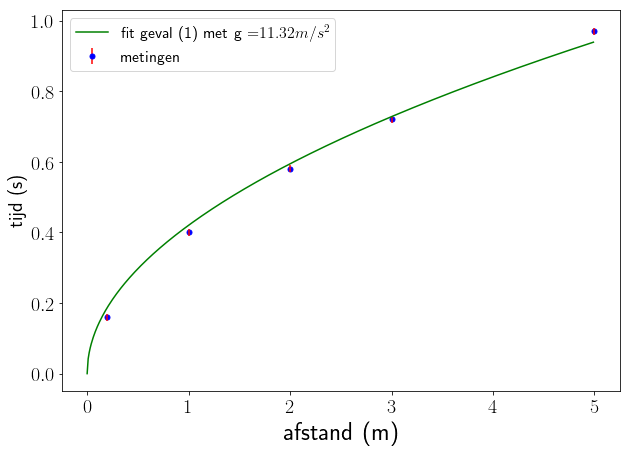

In [50]:
x_fitted_1 = np.arange(0,5,0.01)
y_fitted_1 = time_func_1(x_fitted_1,g_LS_1)
fig = plt.figure(figsize=[10,7]) 
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(afstand,tijd,yerr=dt,fmt='b.',ecolor='r',barsabove=True,ms=10,label='metingen')
ax.plot(x_fitted_1,y_fitted_1,"g",label='fit geval (1) met g =$%.2f  m/s^2$'%xopt_LS_1[0])
plt.xlabel('afstand (m)',fontsize=25);
plt.ylabel('tijd (s)',fontsize=20);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.legend(fontsize=16, loc='upper left')

### Onzekerheid op g?

In [67]:
uncg_fun_LS_1 = lambda k: chi2_fun_1([k]) - chi2_fun_1([g_LS_1]) - (1.)
glow_LS_1 = g_LS_1 - 0.5
glow_LS_1 = fsolve(uncg_fun_LS_1, glow_LS_1)[0]
ghigh_LS_1 = g_LS_1 + 0.5
ghigh_LS_1 = fsolve(uncg_fun_LS_1, ghigh_LS_1)[0]
unc_g_vis_LS_1=(ghigh_LS_1-glow_LS_1)/2.
print("The uncertainty on g is found to be: %.3f"%(unc_g_vis_LS_1))

The uncertainty on g is found to be: 0.161


#### Deel 2: het magneetveld een onbekende maar vaste tijd nodig heeft om tot nul te zakken en het balletje los te laten.

In [51]:
def time_func_2(x,g,T):
    return np.sqrt((2*x)/g) + T

chi2_fun_2 = lambda q: np.sum( np.power(tijd - time_func_2(afstand,q[0],q[1]),2)/np.power(dt,2) )
xopt_LS_2 = fmin(func=chi2_fun_2, x0=[9,0.1])
g_LS_2 = xopt_LS_2[0]
T_LS_2 = xopt_LS_2[1]
print("minimum found at g = %.2f, and T = %.2f"%(xopt_LS_2[0],xopt_LS_2[1]))

Optimization terminated successfully.
         Current function value: 3.869206
         Iterations: 52
         Function evaluations: 101
minimum found at g = 9.87, and T = -0.05


### conclusie: je moet van elke gemeten tijd 0.05 seconden aftrekken opdate de metingen zouden overeenkomen met de gefitte waarden. Dit omdat de mageneet eerst 0.05 seconden nodig had om het balletje los te laten

In [53]:
x_fitted_2 = np.arange(0,5,0.01)
y_fitted_2 = time_func_2(x_fitted_2,g_LS_2,T_LS_2)

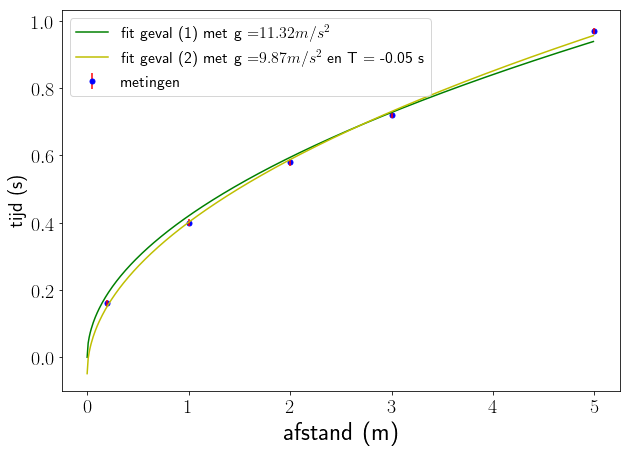

In [61]:
fig2 = plt.figure(figsize=[10,7]) 
ax2 = fig2.add_subplot(1, 1, 1)
ax2.errorbar(afstand,tijd,yerr=dt,fmt='b.',ecolor='r',barsabove=True,ms=10,label='metingen')
ax2.plot(x_fitted_1,y_fitted_1,"g",label='fit geval (1) met g =$%.2f  m/s^2$'%xopt_LS_1[0])
ax2.plot(x_fitted_2,y_fitted_2,"y",label='fit geval (2) met g =$%.2f  m/s^2$ en T = %.2f s'%(xopt_LS_2[0],xopt_LS_2[1]))
plt.xlabel('afstand (m)',fontsize=25);
plt.ylabel('tijd (s)',fontsize=20);
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax2.legend(fontsize=16, loc='upper left')

In [82]:
uncg_fun_LS_2 = lambda k: chi2_fun_2([k[0],T_LS_2]) - chi2_fun_2([g_LS_2,T_LS_2]) - (1.)
glow_LS_2 = g_LS_2 - 0.5
glow_LS_2 = fsolve(uncg_fun_LS_2, glow_LS_2)[0]
ghigh_LS_2 = g_LS_1 + 0.5
ghigh_LS_2 = fsolve(uncg_fun_LS_2, ghigh_LS_2)[0]
unc_g_vis_LS_2=(ghigh_LS_2-glow_LS_2)/2.
uncT_fun_LS_2 = lambda k: chi2_fun_2([g_LS_2,k[0]]) - chi2_fun_2([g_LS_2,T_LS_2]) - (1.)
Tlow_LS_2 = T_LS_2 - 0.5
Tlow_LS_2 = fsolve(uncT_fun_LS_2, Tlow_LS_2)[0]
Thigh_LS_2 = T_LS_2 + 0.5
Thigh_LS_2 = fsolve(uncT_fun_LS_2, Thigh_LS_2)[0]
unc_T_vis_LS_2=(Thigh_LS_2-Tlow_LS_2)/2.
print('The uncertainty on g is found to be: %.3f m/s^2'%(unc_g_vis_LS_2))
print('The uncertainty on T is found to be: %.3f s'%(unc_T_vis_LS_2))

The uncertainty on g is found to be: 0.131 m/s^2
The uncertainty on T is found to be: 0.004 s


[ 9.61013998  9.62013998  9.63013998  9.64013998  9.65013998  9.66013998
  9.67013998  9.68013998  9.69013998  9.70013998  9.71013998  9.72013998
  9.73013998  9.74013998  9.75013998  9.76013998  9.77013998  9.78013998
  9.79013998  9.80013998  9.81013998  9.82013998  9.83013998  9.84013998
  9.85013998  9.86013998  9.87013998  9.88013998  9.89013998  9.90013998
  9.91013998  9.92013998  9.93013998  9.94013998  9.95013998  9.96013998
  9.97013998  9.98013998  9.99013998 10.00013998 10.01013998 10.02013998
 10.03013998 10.04013998 10.05013998 10.06013998 10.07013998 10.08013998
 10.09013998 10.10013998 10.11013998 10.12013998 10.13013998]


"\n\n_xsigma_LS = np.arange(sigma_LS - 2*unc_sigma_vis_LS,sigma_LS + 2*unc_sigma_vis_LS,0.01)\n_ysigma_LS = np.asarray([uncSigma_fun_LS(i)+(1.) for i in _xsigma_LS])\nax6b = fig6.add_subplot(1,2, 2)\nax6b.plot(_xsigma_LS,_ysigma_LS)\nax6b.hlines(1, sigma_LS - 2*unc_sigma_vis_LS,sigma_LS+ 2*unc_sigma_vis_LS)\nax6b.vlines(sigma_LS - unc_sigma_vis_LS,0,1)\nax6b.vlines(sigma_LS + unc_sigma_vis_LS,0,1)\nax6b.vlines(sigma_LS,0,max(_ysigma_LS), linestyles='dashed')\nplt.xlabel('$\\hat{\\sigma}$',fontsize=25);\nplt.ylabel('$-\\Delta \\chi^{2}$',fontsize=20);\nfor tick in ax6b.xaxis.get_major_ticks():\n    tick.label.set_fontsize(20) \nfor tick in ax6b.yaxis.get_major_ticks():\n    tick.label.set_fontsize(20)\n"

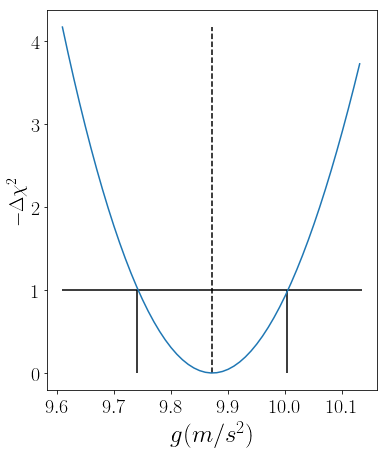

In [88]:
_xg_LS_2 = np.arange(g_LS_2 - 2*unc_g_vis_LS_2,g_LS_2 + 2*unc_g_vis_LS_2,0.01)
print _xg_LS_2
_yg_LS_2 = np.asarray([uncg_fun_LS_2([i])+(1.) for i in _xg_LS_2])
fig6 = plt.figure(figsize=[13,7]) 

ax6a = fig6.add_subplot(1, 2, 1)
ax6a.plot(_xg_LS_2,_yg_LS_2)
ax6a.hlines(1, g_LS_2 - 2*unc_g_vis_LS_2,g_LS_2 + 2*unc_g_vis_LS_2)
ax6a.vlines(g_LS_2 - unc_g_vis_LS_2,0,1)
ax6a.vlines(g_LS_2 + unc_g_vis_LS_2,0,1)
ax6a.vlines(g_LS_2,0,max(_yg_LS_2), linestyles='dashed')
plt.xlabel('$g (m/s^2)$',fontsize=25);
plt.ylabel('$-\Delta \chi^{2}$',fontsize=20);
for tick in ax6a.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax6a.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
"""

_xsigma_LS = np.arange(sigma_LS - 2*unc_sigma_vis_LS,sigma_LS + 2*unc_sigma_vis_LS,0.01)
_ysigma_LS = np.asarray([uncSigma_fun_LS(i)+(1.) for i in _xsigma_LS])
ax6b = fig6.add_subplot(1,2, 2)
ax6b.plot(_xsigma_LS,_ysigma_LS)
ax6b.hlines(1, sigma_LS - 2*unc_sigma_vis_LS,sigma_LS+ 2*unc_sigma_vis_LS)
ax6b.vlines(sigma_LS - unc_sigma_vis_LS,0,1)
ax6b.vlines(sigma_LS + unc_sigma_vis_LS,0,1)
ax6b.vlines(sigma_LS,0,max(_ysigma_LS), linestyles='dashed')
plt.xlabel('$\hat{\sigma}$',fontsize=25);
plt.ylabel('$-\Delta \chi^{2}$',fontsize=20);
for tick in ax6b.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax6b.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
"""